# Climate Data – A hands-on python course
Author: Pedro Herrera Lormendez

Follow the instructions and run the following commands to test that the basic needed python libraries are correctly installed and running.

## Installing software
* Panoply (https://www.giss.nasa.gov/tools/panoply/download/)
* Anaconda (https://www.anaconda.com/download/)

## Installing libraries
Some of the basic neccessary libraries are the following:
* Numpy (https://numpy.org/)
* Scipy (https://scipy.org/)
* Matplotlib (https://matplotlib.org/)
* Pandas (https://pandas.pydata.org/)
* Xarray (https://docs.xarray.dev/en/stable/)
<!-- * Plotly (https://plotly.com/) -->
* Cartopy (https://scitools.org.uk/cartopy/docs/latest/#)
<!-- * Scipy (https://scipy.org/) -->
* netCDF4 (https://unidata.github.io/netcdf4-python/)

Run the following cell to install the neccessary python libraries:

In [12]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install xarray
!pip install SciPy # or conda install scipy
# !pip install plotly
# !pip install "notebook>=5.3" "ipywidgets>=7.5" #neccessary for plotly
!conda install -c conda-forge cartopy #conda highly recommended or !pip install Cartopy 
!pip install netCDF4

⚠︎ When installing Cartopy, using conda is higly recommended. You might need to have Anaconda/Conda installed: https://www.anaconda.com/download/

⚠︎If using macOS you can use [brew](https://brew.sh/) to install it: ```$brew install geos proj```

## Importing the libraries
Run the following cell to import the python libraries and test that they have been properly installed.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
#import cartopy.crs as ccrs
import scipy

## Testing numpy, pandas and matplotlib
Run the following cell to test 

Text(0.5, 0, 'years')

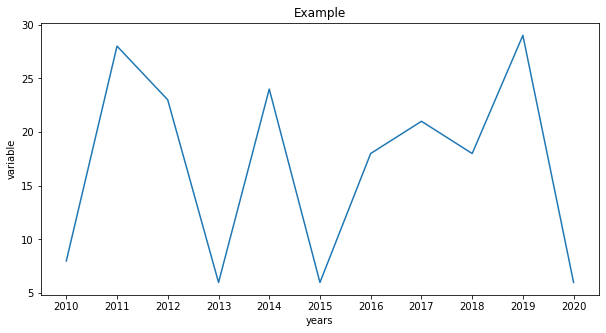

In [4]:
# Creating the x and y arrays
y = np.random.randint(0,30,11)
x =pd.DatetimeIndex(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
                     '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',               
                     '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq=None)
# Creating the figure
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.title('Example')
plt.ylabel('variable')
plt.xlabel('years')

## Testing numpy, matplotlib, xarray and cartopy
* Download the following test dataset: https://www.unidata.ucar.edu/software/netcdf/examples/ECMWF_ERA-40_subset.nc 
* Put the dataset in the "data" folder

In [10]:
# Reading the netcdf file
file_path = '../../data/sample.nc'
DS = xr.open_dataset(file_path).t2m / 100
data = DS.sel(time='2022-07-17T00:00:00.000000000')

/Users/pedroherreralormendez/opt/anaconda3/lib/python3.7/site-packages/cartopy/crs.py:238: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  src_crs, self)
/Users/pedroherreralormendez/opt/anaconda3/lib/python3.7/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/Users/pedroherreralormendez/opt/anaconda3/lib/python3.7/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/Users/pedroherreralormendez/opt/anaconda3/lib/python3.7/site-packages/cartopy/crs.py:256

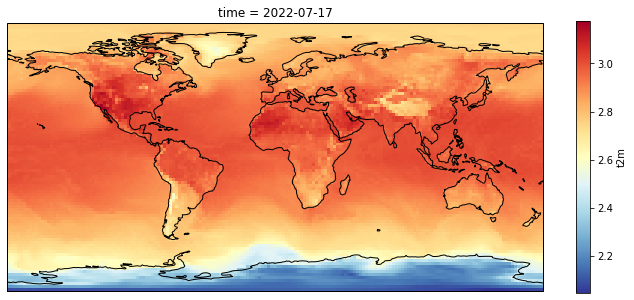

In [11]:
# Plotting the data on a map using Cartopy
projection = ccrs.PlateCarree()  # This is a common projection for geographical data
fig, ax = plt.subplots(figsize=(12, 5), subplot_kw={'projection': projection})
ax.coastlines()
data.plot(ax=ax, cmap='RdYlBu_r',transform=ccrs.PlateCarree())
plt.show()
